In [1]:
import glob

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

In [2]:
df = pd.read_csv('community_dataset.csv')
df

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,cell_interaction,cell_type,case_id,area_of_cell,age_group
0,988.509380,612.076506,10.803755,187.998971,community_1,Stroma cells,891,185,elder_group
1,787.852379,637.787202,11.749179,155.357076,community_1,Stroma cells,891,209,elder_group
2,960.635580,700.283468,15.124372,182.626888,community_2,Stroma cells,891,254,elder_group
3,702.033032,676.409695,14.221883,158.381917,community_3,Unclassified,891,156,elder_group
4,830.399371,863.269930,19.978977,159.071269,community_3,Unclassified,891,194,elder_group
...,...,...,...,...,...,...,...,...,...
269437,928.977004,720.993469,9.667603,29.866927,community_6,Stroma cells,983,258,young_group
269438,651.888363,1040.658354,20.298864,40.847738,community_2,Immune type 1,983,160,young_group
269439,754.601247,688.651619,10.351852,22.967870,community_3,Unclassified,983,190,young_group
269440,901.768538,700.092692,11.459289,57.536165,community_4,Stroma cells,983,535,young_group


Вам нужно проанализировать биоинформатический датасет по пространственной транскриптомике пациентов с плоскоклеточным раком. В нем клетки (колонка cell_type) объединены в микроокружения (колонка cell_interaction) в зависимости от взаимодействия этих клеток. Вашей основной задачей будет поиск отличий в организации микроокружения у пожилых и молодых пациентов (колонка age_group).

Также в датасете есть следующие колонки:

distance_to_vasculature — расстояние до ближайших сосудов;
distance_to_largest_cell — расстояние до ближайшей крупной клетки;
immune_marker_1 — экспрессия иммунного маркера 1 в данной клетке;
immune_marker_2 — экспрессия иммунного маркера 2 в данной клетке;
cell_type — тип клетки;
area_of_cell — размер клетки;
case_id — уникальный ID пациента.

В ноутбуке проанализировать датасет и сделать статистически обоснованные выводы. Ограничения в использовании библиотек/функций: нет, при желании можно воспользоваться pandasql для обработки данных. Не забывайте про PEP8. Ответы в виде графиков со стат-значимостью на них тоже считаются правильным ответом, не забывайте обосновывать применимость стат-теста.

In [3]:
df.describe()

,distance_to_vasculature,distance_to_largest_cell,immune_marker_1,immune_marker_2,case_id,area_of_cell
count,269442.000000,269442.000000,269442.000000,269442.000000,269442.000000,269442.000000
mean,929.070855,763.923963,20.161576,77.737352,543.799330,252.588887
std,232.025464,143.529254,8.878973,62.181699,339.463422,154.717140
min,576.000265,576.000340,0.022423,0.022770,40.000000,45.000000
25%,749.548219,666.386842,14.059163,32.423038,199.000000,180.000000
50%,889.336304,731.602653,19.167223,53.691949,693.000000,230.000000
75%,1067.406152,822.422538,24.883889,114.728847,708.000000,295.000000
max,2057.201309,3181.140602,119.474602,1267.883744,983.000000,6807.000000


In [4]:
df['cell_interaction'].value_counts()

community_4    80969
community_2    51482
community_1    48516
community_5    34881
community_6    26907
community_3    26687
Name: cell_interaction, dtype: int64

In [5]:
df['cell_type'].value_counts()

Stroma cells     173192
Unclassified      66966
Immune type 2     16204
Immune type 1      5575
Blood cells        2818
Bone cells         2555
Largest cells      1988
Vasculature         144
Name: cell_type, dtype: int64

In [6]:
df['age_group'].value_counts()

young_group    188900
elder_group     80542
Name: age_group, dtype: int64

In [7]:
df['case_id'].value_counts()

693    70229
983    51116
40     50062
199    43790
708    23765
566    13732
891     8825
559     7923
Name: case_id, dtype: int64

1. Есть ли стат-значимость между типом клетки и:

а) Размером клетки (area_of_cell), добавьте hue по возрастным группам.
б) Экспрессией иммунных маркеров (immune_marker_1, immune_marker_2), добавьте hue по возрастным группам.
в) Дистанцией до ближайших объектов (distance_to_vasculature, distance_to_largest_cell), добавьте hue по возрастным группам.

В качестве ответов можно приводить box_plot/swarplot, где по одной оси будет тип клеток, а по другой — оцениваемая вами статистика.

а) Проверим статистическую значимость между типом келтки и размером клетки:

<AxesSubplot: xlabel='area_of_cell', ylabel='cell_type'>

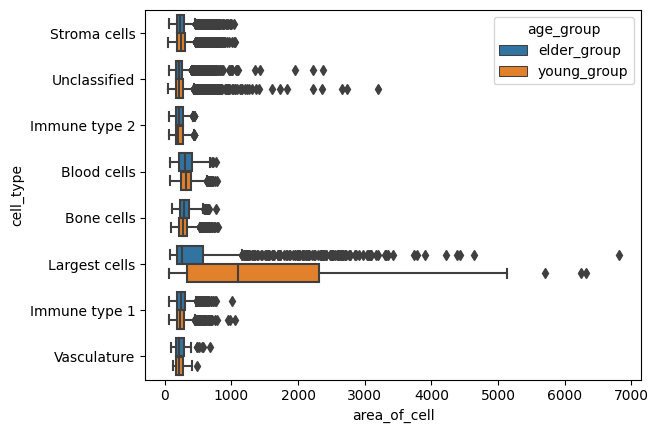

In [8]:
sns.boxplot(
    df, 
    x='area_of_cell', 
    y='cell_type', 
    hue='age_group'
)

Судя по графику, клетки типа largest cells имеют больший размер кнопки, чем клетки остального типа. Также этот размер больше у молодых пациентов.

б) Проверим статистическую значимость между типом келтки и экспрессией иммунных маркеров. Для начала изучим связь с  immune_marker_1:

<AxesSubplot: xlabel='immune_marker_1', ylabel='cell_type'>

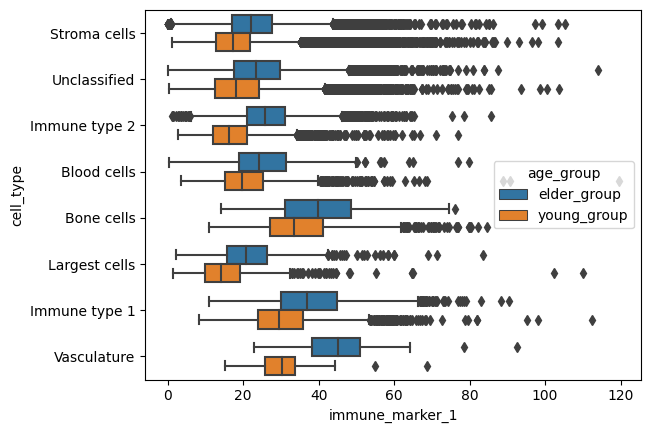

In [9]:
sns.boxplot(
    df[['cell_type', 'immune_marker_1', 'immune_marker_2', 'age_group']], 
    x='immune_marker_1', 
    y='cell_type', 
    hue='age_group'
)

Определённой связи не определяется. По всей видимости, immune_marker_1 может быть в любом типе клеток. Исследуем immune_marker_2:

<AxesSubplot: xlabel='immune_marker_2', ylabel='cell_type'>

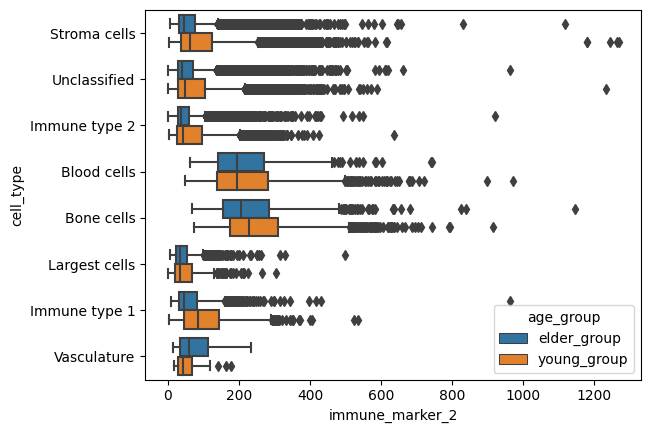

In [10]:
sns.boxplot(
    df[['cell_type', 'immune_marker_1', 'immune_marker_2', 'age_group']], 
    x='immune_marker_2', 
    y='cell_type', 
    hue='age_group'
)

По всей видимости, immune_marker_2 больше связан с клетками крови и костей.

в) Проверим статистическую значимость между типом келтки и дистанцией до ближайших объектов:

<AxesSubplot: xlabel='distance_to_vasculature', ylabel='cell_type'>

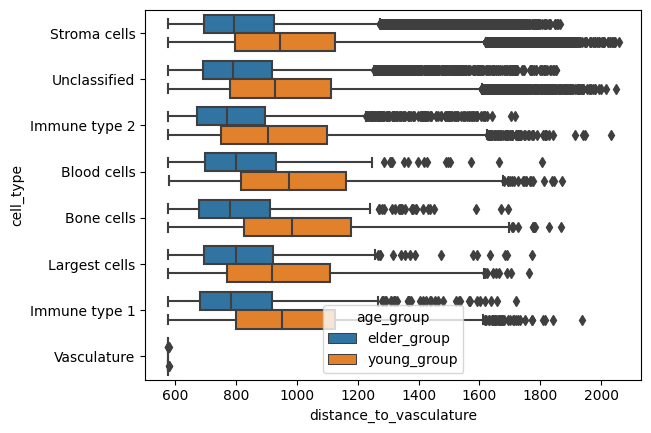

In [11]:
sns.boxplot(
    df[['cell_type', 'distance_to_vasculature', 'distance_to_largest_cell', 'age_group']], 
    x='distance_to_vasculature', 
    y='cell_type', 
    hue='age_group'
)

Видно, что у типа клеток Vasculature нулевое расстояние до сосудов. Остальные клетки в среднем имеют одинаковое расстояние до сосудов.

<AxesSubplot: xlabel='distance_to_largest_cell', ylabel='cell_type'>

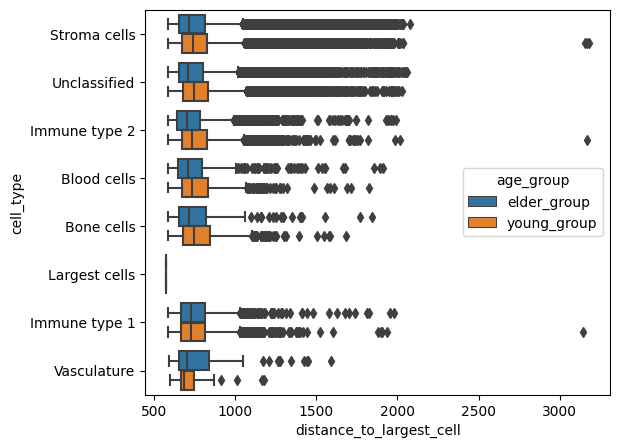

In [12]:
plt.rcParams['figure.figsize'] = (6, 5)
sns.boxplot(
    df[['cell_type', 'distance_to_vasculature', 'distance_to_largest_cell', 'age_group']], 
    x='distance_to_largest_cell', 
    y='cell_type', 
    hue='age_group'
)

Аналогичная ситуация и у типа клеток Largest cells - нулевое расстояние до больших клеток. Остальные клетки в среднем имеют одинаковое расстояние до больших клеток (кроме Vasculature).

2. В каком клеточном микроокружении клеток какого типа статистически больше, чем в других микроокружениях? (колонка cell_interaction). Для ответа используйте box_plot/swarplot с hue по микроокружениям, где:

по Ох будут типы клеток,
по Оу — их количество.
Не забудьте посчитать количество для каждого пациента отдельно, иначе выборка не будет репрезентативной.

[(0.0, 11000.0)]

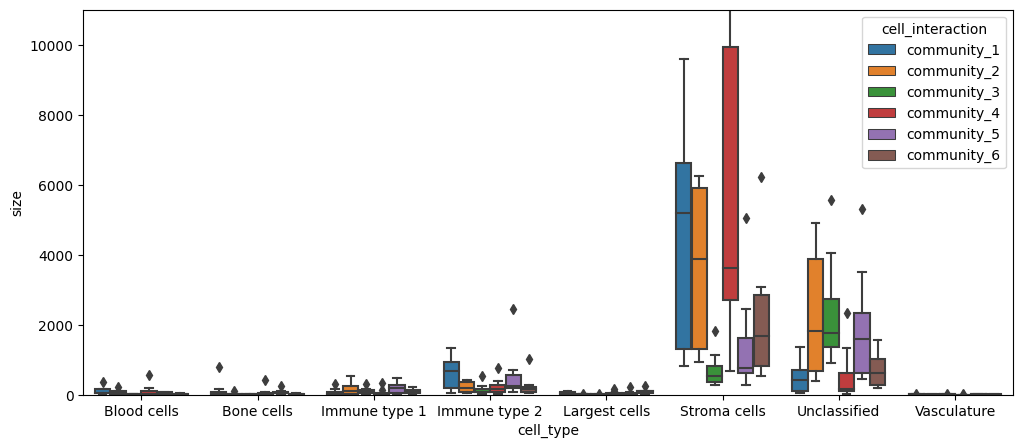

In [13]:
plt.rcParams['figure.figsize'] = (12, 5)
ax = sns.boxplot(
    df.groupby(['cell_type', 'case_id', 'cell_interaction'], as_index=False).size(), 
    x='cell_type', 
    y='size', 
    hue='cell_interaction'
)
ax.set(ylim=(0, 11000))

Видно, что в микроокружениях 1, 2, 4, 6 больше клеток типа Stroma cells. А в окружениях 3, 5 больше клеток типа Unclassified.

3. Есть ли разница в доле микроокружения в тканях пациентов разных возрастов? Для ответа используйте box_plot/swarplot с hue по возрастным группам, где:

по Ох будут микроокружения,
по Оу — их доля в ткани пациента.
Не забудьте посчитать доли для каждого пациента отдельно, иначе выборка не будет репрезентативной.

[(0.0, 2000.0)]

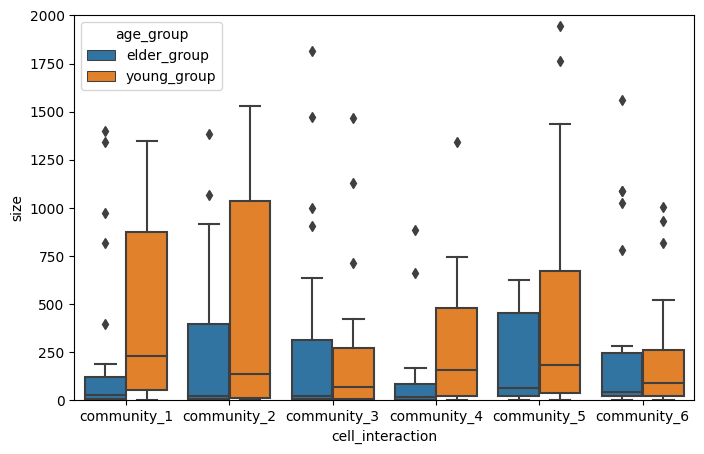

In [14]:
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.boxplot(
    df.groupby(['cell_type', 'case_id', 'cell_interaction', 'age_group'], as_index=False).size(), 
    x='cell_interaction', 
    y='size', 
    hue='age_group'
)
ax.set(ylim=(0, 2000))

По графикам видно, что для микроокружений 1, 2 и 4 их доля в тканях пациента сильно больше у молодных пациентов, чем у пожилых. У 6 микроокружения разница в сторону молодых пациентов есть, но не такая большая. У микроокружений 3 и 6 разницы по возрасту нет.

4. Правда ли, что иммунные клетки (Immune type 1 и Immune type 2) лежат ближе к сосудам и крупным клеткам (Обе колонки distance), чем стромальные клетки (Stroma cells) у молодых, но не у пожилых пациентов? Эту гипотезу нужно проверить бутстрапом (как разницу средних для двух выборок).

In [15]:
test = df.copy()
test = test.loc[(test['cell_type'] == 'Immune type 1') | (test['cell_type'] == 'Immune type 2') | (test['cell_type'] == 'Stroma cells')]
test['distance'] = test['distance_to_vasculature'] + test['distance_to_largest_cell']

test.groupby(['cell_type', 'case_id', 'age_group'], as_index=False).mean(numeric_only=True)

test.groupby(['cell_type', 'case_id', 'age_group'], as_index=False).size()


,cell_type,case_id,age_group,size
0,Immune type 1,40,elder_group,1140
1,Immune type 1,199,young_group,827
2,Immune type 1,559,elder_group,150
3,Immune type 1,566,elder_group,137
4,Immune type 1,693,young_group,1657
5,Immune type 1,708,young_group,425
6,Immune type 1,891,elder_group,156
7,Immune type 1,983,young_group,1083
8,Immune type 2,40,elder_group,5917
9,Immune type 2,199,young_group,2697


5. Правда ли, что иммунные клетки в среднем лежат ближе к сосудам у молодых, но не у пожилых пациентов? Эту гипотезу необходимо проверить пермутационным тестом (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.permutation_test.html). В качестве исходной статистики берем массив с расстояниями только для данного типа клеток (длина - n), запоминаем среднее для каждого пациента. На каждой итерации набираем выборку размером n из всей! колонки с расстояниями до сосудов и смотрим соотношение с исходной статистикой. Проверяем гипотезы. Комбинировать p-values для каждой возрастной группы можно с помощью этого инструмента (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.combine_pvalues.html).